# 📊 Sales Data Analysis (Beginner Example)

**Business Question:** 👉 _What are the monthly sales trends for our products?_

### Steps:
1️⃣ Define problem  
2️⃣ Get CSV from Kaggle  
3️⃣ Clean data  
4️⃣ Plot monthly sales  
5️⃣ Plot top products  
6️⃣ Correlation between discount % & volume  
7️⃣ Visualization with matplotlib  
8️⃣ Recommendation  
9️⃣ Automation option  

## 1️⃣ Import Libraries & Load Data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
#df = pd.read_csv('../data/sample_sales_data.csv', parse_dates=['ORDERDATE'])
df = pd.read_csv('data/sample_sales_data.csv', parse_dates=['ORDERDATE'], encoding='latin1')


# Display first 5 rows
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## 2️⃣ Clean Data
- Handle missing dates
- Drop duplicates
- Create YearMonth column

In [20]:
# Drop rows with missing dates
df = df.dropna(subset=['ORDERDATE'])

# Drop duplicates
df = df.drop_duplicates()

# Create YearMonth column
df['YearMonth'] = df['ORDERDATE'].dt.to_period('M')

# Save cleaned version
df.to_csv('output/cleaned_sales_data.csv', index=False)

# Check cleaned data
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YearMonth
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2003-02
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2003-05
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,2003-07
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,2003-08
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,2003-10


## 3️⃣ Monthly Sales Trend

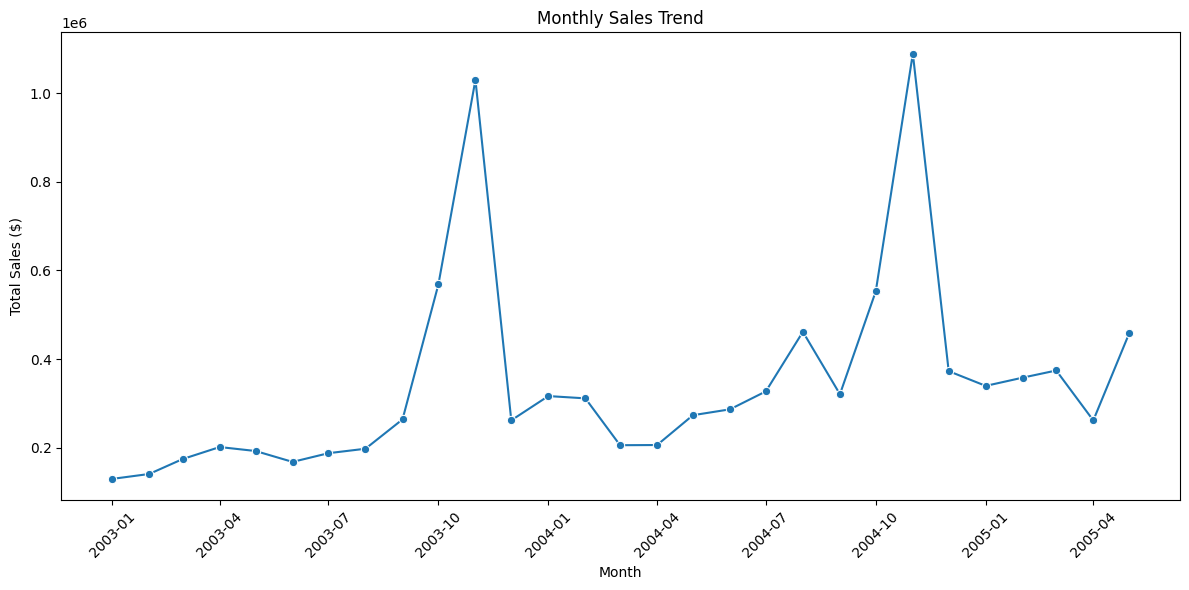

In [21]:
# Monthly sales trend
monthly_sales = df.groupby('YearMonth')['SALES'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='SALES', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('output/monthly_sales.png')
plt.show()


## 4️⃣ Top 10 Products by Sales

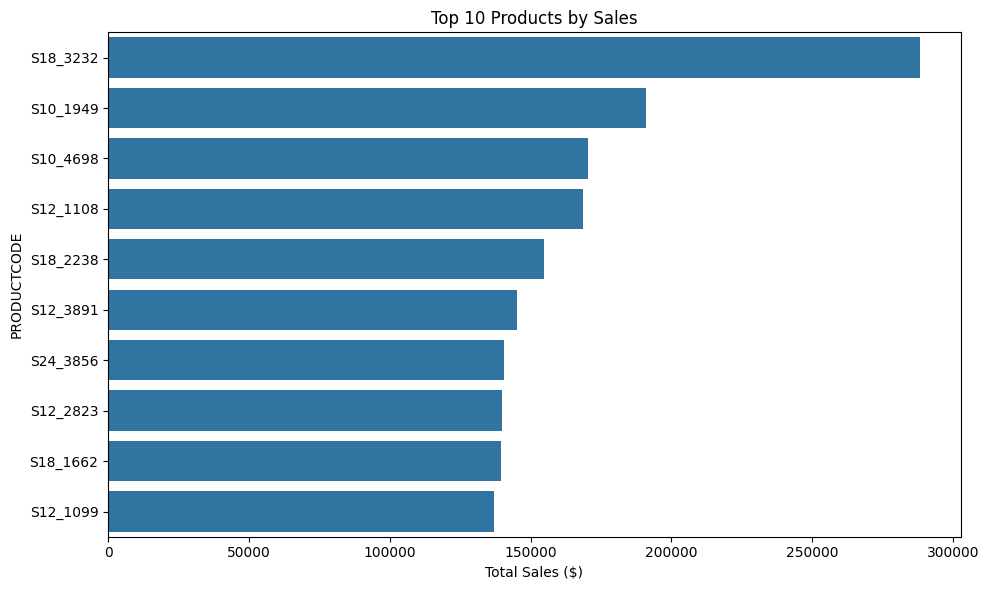

In [22]:
# Top 10 products by sales
top_products = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales ($)')
plt.tight_layout()
plt.savefig('output/top_products.png')
plt.show()


## 5️⃣ Correlation: Discount % vs Quantity Ordered

In [23]:
# Simulate discount %
df['discount_percent'] = 100 - (df['PRICEEACH'] / df['MSRP'] * 100)

# Correlation
correlation = df['discount_percent'].corr(df['QUANTITYORDERED'])
print(f"Correlation between discount % and quantity ordered: {correlation:.2f}")


Correlation between discount % and quantity ordered: 0.03


## 6️⃣ Business Recommendation

- Increase inventory of **top products** for **Q4 (October - December)**
- Use trend line to forecast inventory needs
- Monitor correlation of discount % to adjust promotional campaigns